<a href="https://colab.research.google.com/github/ananyanivarthi/FakeNewsDetection/blob/main/FND(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import itertools
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/True.csv")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-10-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-10-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [ ]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
df = df_merge.drop([ "subject","date"], axis = 1)
df.isnull().sum()

title    0
text     0
class    0
dtype: int64

In [ ]:
df = df.sample(frac = 1)

# New Section

In [ ]:
df.head()

,title,text,class
8809,Obama says U.S. government must improve cyber ...,MADRID (Reuters) - U.S. President Barack Obama...,1
16956,UNBELIEVABLE: OBAMA Stands Firm On Taking Rand...,This isn t the first time Obama left an import...,0
12153,Argentine Congress to make fresh attempt at pe...,BUENOS AIRES (Reuters) - Argentina s lower hou...,1
764,Business group pushes for U.S. flood insurance...,WASHINGTON (Reuters) - The latest attempt to o...,1
2662,Trump to nominate Raytheon lobbyist for Army s...,WASHINGTON (Reuters) - U.S. President Donald T...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
df=df.dropna()
df.head(10)

,title,text,class
8809,Obama says U.S. government must improve cyber ...,MADRID (Reuters) - U.S. President Barack Obama...,1
16956,UNBELIEVABLE: OBAMA Stands Firm On Taking Rand...,This isn t the first time Obama left an import...,0
12153,Argentine Congress to make fresh attempt at pe...,BUENOS AIRES (Reuters) - Argentina s lower hou...,1
764,Business group pushes for U.S. flood insurance...,WASHINGTON (Reuters) - The latest attempt to o...,1
2662,Trump to nominate Raytheon lobbyist for Army s...,WASHINGTON (Reuters) - U.S. President Donald T...,1
20675,Victims of Colombia's civil war seek healing f...,VILLAVICENCIO (Reuters) - Blanca Real traveled...,1
2971,House panel wants to know how climate change i...,WASHINGTON (Reuters) - U.S. lawmakers on the H...,1
6518,Trump voices new doubts about Russian efforts ...,WASHINGTON (Reuters) - President-elect Donald ...,1
13113,"In Brussels, Tillerson offers EU strong U.S. s...",BRUSSELS (Reuters) - U.S. Secretary of State R...,1
14315,China pledges to be more open to providing inf...,SHANGHAI (Reuters) - Central and local governm...,1


In [ ]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,title,text,class
0,8809,Obama says U.S. government must improve cyber ...,MADRID (Reuters) - U.S. President Barack Obama...,1
1,16956,UNBELIEVABLE: OBAMA Stands Firm On Taking Rand...,This isn t the first time Obama left an import...,0
2,12153,Argentine Congress to make fresh attempt at pe...,BUENOS AIRES (Reuters) - Argentina s lower hou...,1
3,764,Business group pushes for U.S. flood insurance...,WASHINGTON (Reuters) - The latest attempt to o...,1
4,2662,Trump to nominate Raytheon lobbyist for Army s...,WASHINGTON (Reuters) - U.S. President Donald T...,1
5,20675,Victims of Colombia's civil war seek healing f...,VILLAVICENCIO (Reuters) - Blanca Real traveled...,1
6,2971,House panel wants to know how climate change i...,WASHINGTON (Reuters) - U.S. lawmakers on the H...,1
7,6518,Trump voices new doubts about Russian efforts ...,WASHINGTON (Reuters) - President-elect Donald ...,1
8,13113,"In Brussels, Tillerson offers EU strong U.S. s...",BRUSSELS (Reuters) - U.S. Secretary of State R...,1
9,14315,China pledges to be more open to providing inf...,SHANGHAI (Reuters) - Central and local governm...,1


In [ ]:
messages['title'][6]

'House panel wants to know how climate change impacts the military'

In [ ]:
import re

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['title'].iloc[i]))
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = cv.fit_transform(corpus).toarray()
y = df['class']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)



In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
pickle_out = open('logistic_model.pkl', 'wb')
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [ ]:

model = pickle.load(open('logistic_model.pkl', 'rb'))

In [ ]:
input_text = "This is a fake news article"
input_features = cv.transform([input_text]).toarray()
prediction = model.predict(input_features)

if prediction[0] == 0:
    print("The news is classified as fake.")
else:
    print("The news is classified as real.")

The news is classified as fake.


Confusion matrix, without normalization


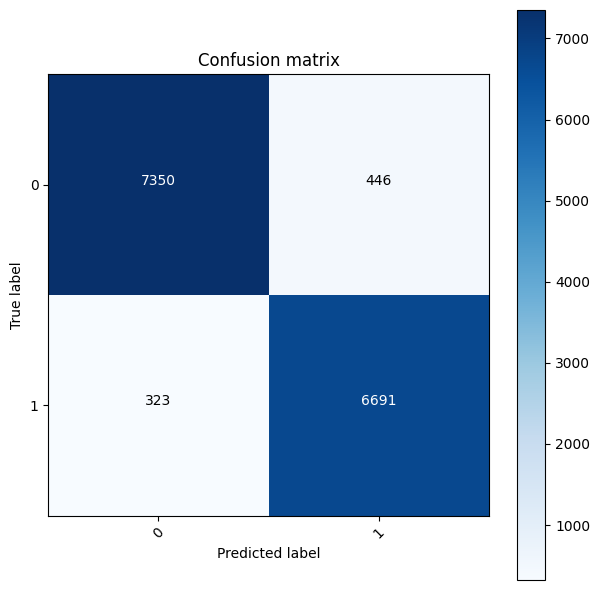

Accuracy: 0.9480756245779879
Precision: 0.9375087571808883
Recall: 0.953949244368406
True Positive Rate (TPR): 0.953949244368406
False Positive Rate (FPR): 0.05720882503848127
F1 Score: 0.9456575507031305
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7796
           1       0.94      0.95      0.95      7014

    accuracy                           0.95     14810
   macro avg       0.95      0.95      0.95     14810
weighted avg       0.95      0.95      0.95     14810



In [ ]:
pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, pred)
classes = [0, 1]

plt.figure(figsize=(6, 6))
plot_confusion_matrix(cm, classes)
plt.show()

# Metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
tpr = recall
fpr = cm[0, 1] / (cm[0, 1] + cm[0, 0])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)
print("F1 Score:", f1)

# Classification report
print(classification_report(y_test, pred))